In [1]:
# 3 Observable Trendsn (based on results ran on 4/26/18 @ approx 6:30pm): 
# --------------------
# 1. If there is such a thing as "fake news", then all of the selected news organizations are reporting it;
#     the numbers are too similar
# 2. Republicans like to say there is a media bias while Democrats typically deny that; 
#     it surprises me that Fox News is closest to neutral... maybe there is a left-leaning media bias?
# 3. BBC has always struck me as the most impartial news outlet, probably because they are a foreign outlet
#     so why would they be biased? But they are actually the most negative of the selected news organizations.
#     I wonder if this is typical or due to the current administration; nothing seems "normal" this past year
#     in politics.

In [2]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import pprint

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from textblob import TextBlob

# styling for plots
plt.style.use("seaborn")

from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# build list for target users
target_terms = ("@BBCWorld", "@CBSNews", "@CNN",
                "@FoxNews", "@nytimes")

In [4]:
# List to hold results
results_list = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# holding tweet info
tweet_source = []
tweet_text = []
tweet_date = []
counter = []


# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None
    
    #counter
    y = 0

    # Loop through 10 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.user_timeline(
            target, max_id=oldest_tweet, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            y = y+1
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_source.append(tweet["user"]["name"])
            tweet_date.append(tweet["created_at"])
            tweet_text.append(tweet["text"])
            counter.append(y)

        # Set the new oldest_tweet value
        oldest_tweet = tweet["id"] - 1
    

In [5]:
news_df = pd.DataFrame({"Compound": compound_list, "Positive": positive_list, 
                        "Negative": negative_list, "Neutral": neutral_list, "Tweet Source": tweet_source,
                        "Tweet Date": tweet_date, "Tweet Text": tweet_text, "Tweets Ago": counter})
news_df

,Compound,Negative,Neutral,Positive,Tweet Date,Tweet Source,Tweet Text,Tweets Ago
0,0.0000,0.000,1.000,0.000,Sun Apr 29 01:34:30 +0000 2018,BBC News (World),Trump says US-North Korea summit may be 'in th...,1
1,-0.5423,0.304,0.696,0.000,Sun Apr 29 01:25:16 +0000 2018,BBC News (World),#MeToo: Why sexual harassment is a reality in ...,2
2,-0.2263,0.174,0.826,0.000,Sun Apr 29 01:13:32 +0000 2018,BBC News (World),Hungary's dominant leader Orban defiant on kee...,3
3,-0.4939,0.286,0.714,0.000,Sun Apr 29 01:10:30 +0000 2018,BBC News (World),Nigerian Senator Dino Melaye and his many scan...,4
4,0.0000,0.000,1.000,0.000,Sun Apr 29 01:04:24 +0000 2018,BBC News (World),Why you may have been eating insects your whol...,5
5,-0.6486,0.350,0.650,0.000,Sun Apr 29 00:55:20 +0000 2018,BBC News (World),Golden State Killer: The end of a 40-year hunt...,6
6,-0.3400,0.320,0.469,0.211,Sun Apr 29 00:37:40 +0000 2018,BBC News (World),Armenia crisis: Ruling party quits PM race htt...,7
7,0.0000,0.000,1.000,0.000,Sun Apr 29 00:02:26 +0000 2018,BBC News (World),Can music bridge Thailand's sectarian divide? ...,8
8,0.0000,0.000,1.000,0.000,Sat Apr 28 23:53:56 +0000 2018,BBC News (World),Chernobyl's new generation https://t.co/ZMzYDo...,9
9,0.0000,0.000,1.000,0.000,Sat Apr 28 23:30:39 +0000 2018,BBC News (World),From Russian orphan to Team USA https://t.co/s...,10


In [6]:
news_df.to_csv("news df")

In [7]:
average_sentiment = news_df.groupby("Tweet Source").mean()["Compound"]
average_sentiment

Tweet Source
BBC News (World)     -0.113774
CBS News             -0.102114
CNN                  -0.014316
Fox News              0.152086
The New York Times   -0.094131
Name: Compound, dtype: float64

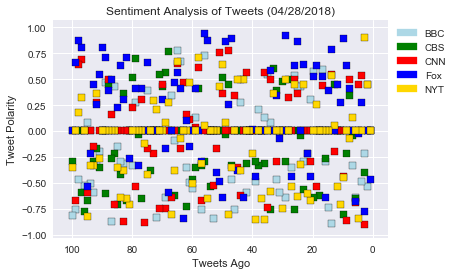

In [8]:
# build a scatter plot
for index, row in news_df.iterrows():
    if row["Tweet Source"]=="BBC News (World)":
        plt.scatter(row["Tweets Ago"], row["Compound"], c="lightblue", alpha=1.0, edgecolor="black", marker=",")
    if row["Tweet Source"]=="CBS News":
        plt.scatter(row["Tweets Ago"], row["Compound"], c="green", alpha=1.0, edgecolor="black", marker=",")
    if row["Tweet Source"]=="CNN":
        plt.scatter(row["Tweets Ago"], row["Compound"], c="red", alpha=1.0, edgecolor="black", marker=",")
    if row["Tweet Source"]=="Fox News":
        plt.scatter(row["Tweets Ago"], row["Compound"], c="blue", alpha=1.0, edgecolor="black", marker=",")
    if row["Tweet Source"]=="The New York Times":
        plt.scatter(row["Tweets Ago"], row["Compound"], c="gold", alpha=1.0, edgecolor="black", marker=",")


# legend colors        
lightblue_patch = mpatches.Patch(color='lightblue', label='BBC')
green_patch = mpatches.Patch(color='green', label='CBS')
red_patch = mpatches.Patch(color='red', label='CNN')
blue_patch = mpatches.Patch(color='blue', label='Fox')
gold_patch = mpatches.Patch(color='gold', label='NYT')

# legend
date = time.strftime("%m/%d/%Y")
plt.title("Sentiment Analysis of Tweets (" + date + ")")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
lgd = plt.legend(handles=[lightblue_patch, green_patch, red_patch, blue_patch, gold_patch], loc='upper right', bbox_to_anchor=(1.2,1.0))

plt.gca().invert_xaxis()

plt.savefig("tweet polarity.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

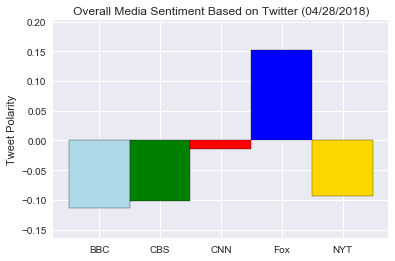

In [9]:
# build a bar graph
x_axis = ("BBC", "CBS", "CNN", "Fox", "NYT")

plt.ylim(min(average_sentiment)-.05, max(average_sentiment)+.05)
plt.bar(x_axis, average_sentiment, color=("lightblue", "green", "red", "blue", "gold"), edgecolor = "black", align="center", width=1)
plt.ylabel("Tweet Polarity")
plt.title('Overall Media Sentiment Based on Twitter ('+date+')')

plt.savefig("overall media sentiment.png")
